### Question 1

How do you handle duplicate values in a dataset in Python?

In [99]:
import pandas as pd

In [100]:
df = pd.read_csv("BA501_python_data.csv")

In [101]:
# handle duplicate values in this dataset in Python
df.drop_duplicates(inplace=True)

### Question 2

You are given two tables - friend_request and request_accepted. Friend_request contains requester_id, time and sent_to_id and request_accepted table contains time, acceptor_id and requestor_id. How will you determine the overall acceptance rate of requests? 

In [45]:
friend_request=[['requester_id','sent_to_id','time'],[101,201, '2018-05-01'],[102, 202, '2018-05-06'],[103, 203, '2018-05-18']]
request_accepted=[['requester_id','acceptor_id','time'],[101, 201, '2018-05-02'], [102, 202, '2018-05-06']]

In [46]:
friend_request = pd.DataFrame(friend_request[1:],columns=friend_request[0])
request_accepted = pd.DataFrame(request_accepted[1:],columns=request_accepted[0])

In [47]:
friend_request

,requester_id,sent_to_id,time
0,101,201,2018-05-01
1,102,202,2018-05-06
2,103,203,2018-05-18


In [48]:
request_accepted

,requester_id,acceptor_id,time
0,101,201,2018-05-02
1,102,202,2018-05-06


In [94]:
# Write in Python
result = pd.merge(friend_request,request_accepted,how="left",left_on=["requester_id", "sent_to_id"], right_on=["requester_id", "acceptor_id"])

In [95]:
result

,requester_id,sent_to_id,time_x,acceptor_id,time_y
0,101,201,2018-05-01,201.0,2018-05-02
1,102,202,2018-05-06,202.0,2018-05-06
2,103,203,2018-05-18,NaN,NaN


In [97]:
result['acceptor_id'].count()/result['requester_id'].count()

0.6666666666666666

In [18]:
# write in SQL
SELECT COUNT(r.acceptor_id)/COUNT(f.requestor_id)
FROM friend_request f LEFT JOIN request_accepted r
ON f.requester_id = r.requester_id AND f.sent_to_id = r.acceptor_id

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


### Question 3

“Issuer” of a credit card are companies like Visa, Mastercard, American Express. Now we know the following rules:

CC number starts with: '4'
CC len : 16
Issuer: VISA

CC number starts with: '34', '37'
CC len : 15
Issuer : AMEX

CC number starts with: '36'
CC len : 14
Issuer : Diners Club

Credit card number starts with
'4026', '417500', '4405', '4508', '4844',
'4913', '4917'
CC len : 16
Issuer : VISAELECTRON

Now write Python scripts to identify the issuer of the following credit card numbers:

'4175004175004172' 
'4917491749174917'
'346416800707698'
'376416800707698'
'37641680070769832112'
'36641680070769'
'54545641680070769’ 

In [87]:
card_numbers = ['4175004175004172','4917491749174917','346416800707698','376416800707698','37641680070769832112','36641680070769','54545641680070769']

In [88]:
def getCardType(card_number):
    if (card_number[0:2] == "34" or card_number[0:2] == "37") and (len(card_number) == 15):
        print("AMEX")
    elif (card_number[0:2] == "36") and (len(card_number) == 14):
        print("Diners Club")
    elif (card_number[0:1] == "4" and (len(card_number) == 16)):
        if (card_number[0:4] == "4026") or (card_number[0:6] == "417500") or (card_number[0:4] == "4405") or (card_number[0:4] == "4844") or (card_number[0:4] == "4913") or (card_number[0:4] == "4917"):
            print("VISAELECTRON")
        else:
            print("VISA")
    else:
        print("Not able to identify the issuer")

In [89]:
for card_number in card_numbers:
    getCardType(card_number)

VISAELECTRON
VISAELECTRON
AMEX
AMEX
Not able to identify the issuer
Diners Club
Not able to identify the issuer


### Question 4

Similarly to PrintDailyTimeSeries() in the sample code, write a Python function called PrintCumulativeTimeSeries(). Specifically:

The function takes three inputs:
experiment_id
country
vertical

The function produces two outputs:
A time series chart showing the cumulative uplift (hint: search for cumsum)
Print out the cumulative % uplift on revenue, experiment vs. control. Hint: (red - blue) / blue %

In [107]:
import numpy as np
import matplotlib.pyplot as plt

In [108]:
df.head()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [164]:
df['date'] = pd.to_datetime(df.date.astype(str))

In [166]:
def GetCumulativeSeries(df, my_id, country):
    table = df[["date", "spend_usd"]][(df.experiment_id == my_id) & (df.country == country)]
    series = table.groupby('date')['spend_usd'].sum()
    series = np.cumsum(series)
    return series

def PlotSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="red", label="experiment")
    ax.plot(control_series, color="blue", label="control")
    ax.set_title("Red vs. Blue")
    ax.set_ylabel("Total spend")
    ax.grid(True, which="both")
    ax.legend()
    plt.gcf().autofmt_xdate()
    plt.show()
    
def PrintCumulativeTimeSeries(df, experiment_ids, country):
    df = df.sort_values("date", ascending=True, inplace=False)
    experiment_series = GetCumulativeSeries(df, experiment_ids[0], country)
    control_series = GetCumulativeSeries(df, experiment_ids[1], country)
    cum_pecent_uplift = experiment_series.iloc[-1]/control_series.iloc[-1] - 1
    print("Cumulative revenue impact: {:.3%}".format(cum_pecent_uplift))
    PlotSeries(experiment_series, control_series)

Cumulative revenue impact: -4.466%


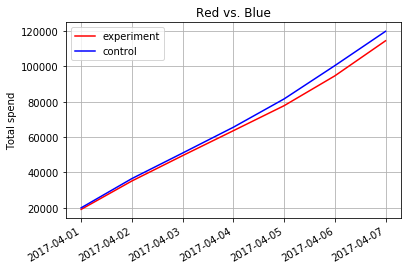

In [167]:
PrintCumulativeTimeSeries(df, [12624548,12624549], "US")

Cumulative revenue impact: -2.469%


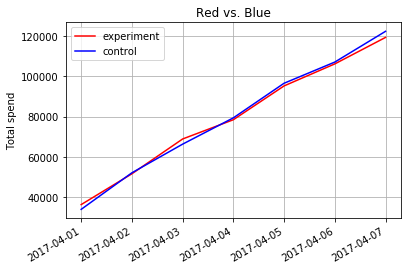

In [168]:
PrintCumulativeTimeSeries(df, [12624548,12624549], "JP")